# Basic setup

## Setup check-up

In [2]:
try:
    import langchain
    print("Langchain est installé, version:", langchain.__version__)
except ImportError:
    print("Langchain n'est pas installé.")

Langchain est installé, version: 0.3.13


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

try:
    from transformers import pipeline
    print("Hugging Face Transformers est installé.")
except ImportError:
    print("Hugging Face Transformers n'est pas installé.")

2025-02-24 18:36:01.771574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740418561.790503 2173261 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740418561.797672 2173261 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Hugging Face Transformers est installé.


In [4]:
try:
    import tensorflow as tf
    print("TensorFlow est installé, version:", tf.__version__)
except ImportError:
    print("TensorFlow n'est pas installé.")

TensorFlow est installé, version: 2.18.0


In [5]:
import torch

torch.cuda.is_available()

True

## Setup the LLM manager

### Purge the system

In [ ]:
# !yes | docker system prune -a

### Install the Ollama Server

In [ ]:
# !docker create --gpus=all -v ollama:/root/.ollama -p 11434:11434 --name llm_server ollama/ollama

In [5]:
!docker ps

CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES


### Update the Ollama server

In [6]:
!docker pull ollama/ollama

Using default tag: latest
latest: Pulling from ollama/ollama

2f032d67: Pulling fs layer 
08c220d5: Pulling fs layer 
c8d09c74: Pulling fs layer 
Digest: sha256:82956f40bb1f307c77f7a8c3ed91c7a37e072ed757ff143e34210a7b991b9480
Status: Downloaded newer image for ollama/ollama:latest
docker.io/ollama/ollama:latest


In [7]:
!docker exec -it llm_server ollama --version

Error response from daemon: container d9426321f9ec18bd046b50d68878c609ebe48db562d1d35053942a93aaef9ef9 is not running


### Run or stop the LLM server

In [1]:
!docker stop llm_server

llm_server


In [1]:
!docker start llm_server

llm_server


### Pull the modules (llms)

In [9]:
!docker exec -it llm_server ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕████████████████▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕████████████████▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕████████████████▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕█████████

In [ ]:
# !docker exec -it llm_server ollama pull mistral:7b-instruct

In [10]:
!docker exec -it llm_server ollama pull nomic-embed-text

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling 970aa74c0a90... 100% ▕████████████████▏ 274 MB                         
pulling c71d239df917... 100% ▕████████████████▏  11 KB                         
pulling ce4a164fc046... 100% ▕████████████████▏   17 B                         
pulling 31df23ea7daa... 100% ▕████████████████▏  420 B                         
verifying sha256 digest 
writing manifest 
success 


In [18]:
!docker exec -it llm_server ollama pull mistral

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling manifest     ▏    0 B/4.1 GB                  
pulling manifest     ▏    0 B/4.1 GB                  
pulling manifest     ▏ 145 KB/4.1 GB                  
pulling manifest     ▏ 1.0 MB/4.1 GB                  
pulling manifest     ▏ 1.5 MB/4.1 GB                  
pulling manifest     ▏ 3.0 MB/4.1 GB                  
pulling manifest     ▏ 4.5 MB/4.1 GB                  
pulling manifest     ▏ 5.1 MB/4.1 GB                  
pulling manifest     ▏ 6.7 MB/4.1 GB                  
pulling manifest     ▏ 7.9 MB/4.1 GB                  
pulling manifest     ▏ 8.6 MB/4.1 GB  8.6 MB/s   7m56s
pulling manifest    ▏ 10.0 MB/4.1 GB  8.6 MB/s   7m56s
pulling manifest     ▏  11 MB/4.1 GB  8.6 MB/s   7m56s
pulling manifest     ▏  12 MB/4.1 GB  8.6 MB/s   7m56s
pulling manifest     ▏  13 MB/4.1 GB  8.6 MB/s   7m56s
pulli

#### List the pulled model

In [13]:
!docker exec -it llm_server ollama list

NAME                                   ID              SIZE      MODIFIED           
nomic-embed-text:latest                0a109f422b47    274 MB    About a minute ago    
llama3.2:latest                        a80c4f17acd5    2.0 GB    About a minute ago    
mistral:7b-instruct                    f974a74358d6    4.1 GB    6 weeks ago           
llama3.2-vision:11b-instruct-q4_K_M    085a1fdae525    7.9 GB    6 weeks ago           


#### Remove a pulled model

In [ ]:
# !docker exec -it llm_server ollama rm mistral:7b-instruct

#### Test the pulled model

In [1]:
from langchain_ollama import ChatOllama
llm = ChatOllama(model="llama3.2", temperature=0)

In [3]:
llm.invoke("The first publicly large scale available chat AI was ...")

AIMessage(content='...ELIZA, developed in 1966 by Joseph Weizenbaum at MIT. ELIZA was a natural language processing (NLP) program that simulated a conversation by using a set of pre-defined responses to match user inputs. It was named after Eliza Doolittle, a character from George Bernard Shaw\'s play "Pygmalion."', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2025-02-24T17:34:36.157270331Z', 'done': True, 'done_reason': 'stop', 'total_duration': 4181036194, 'load_duration': 3065279228, 'prompt_eval_count': 35, 'prompt_eval_duration': 195000000, 'eval_count': 73, 'eval_duration': 905000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-00bd726a-8059-4e63-98b3-2970f885c08d-0', usage_metadata={'input_tokens': 35, 'output_tokens': 73, 'total_tokens': 108})

## Setup the environment

In [230]:
from dotenv import load_dotenv
import os

# Load environment variables from the custom file
load_dotenv("config.env")

# Retrieve and store the variables exactly as named
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Exemples Langchain

## Un simple chaîne

In [ ]:
# Importing necessary modules from the LangChain core library
from langchain_core.messages import HumanMessage, AIMessage  # To manage message types (human/system)
from langchain_core.output_parsers import StrOutputParser  # To parse the output from the model
from langchain_core.prompts import ChatPromptTemplate  # To create prompt templates for the LLM

# Defining a system message template with a prompt that explains a specific topic
system_template = "Explain to the user the story of the {topic} he asked for."

# Creating a ChatPromptTemplate object using system and user messages
# The system message uses the 'system_template', while the user message contains the user's input as 'text'
sc_prompt_template = ChatPromptTemplate.from_messages(
    [system_template, "{text}"]
)

# Creating a string output parser to handle the output as plain text
sc_parser = StrOutputParser()

# Defining a chain that connects the prompt template, the LLM, and the output parser
# This chain processes the prompt, generates the response, and parses it
simplechain = sc_prompt_template | llm | sc_parser

In [ ]:
simplechain.invoke({"topic": "Natural Language Processing", "text": "Tell me more about IBM Watson"})

## Structured Output Parser

In [ ]:
from pydantic import BaseModel, Field

# Définition d'un modèle Pydantic pour la sortie
class ResponseFormatter(BaseModel):
    answer: str = Field(description="La réponse à la question de l'utilisateur.")
    followup_question: str = Field(description="Une question de suivi que l'utilisateur pourrait poser.")

# Lier le modèle à l'output structuré
structured_model = llm.with_structured_output(ResponseFormatter, include_raw=True)

# Exemple d'invocation
response = structured_model.invoke("Quel est le capital de l'Allemagne ?")

# Afficher la sortie structurée
print(response)

In [ ]:
print(response['parsed'].followup_question)

In [ ]:
from langchain.output_parsers import PydanticOutputParser

parser = PydanticOutputParser(pydantic_object=ResponseFormatter)
print(parser.get_format_instructions())

## Le Templates

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("Donne-moi une blague sur {sujet}.")
response = prompt_template.invoke({"sujet": "les chats"})
response

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_messages([
    ("system", "Tu es un assistant utile."),
    ("user", "Raconte-moi une blague sur les chats.")
])
response = prompt_template.invoke({})
response

## Les Embeddings

In [ ]:
# Installer la version mise à jour si nécessaire

from langchain_ollama import OllamaEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore

# Initialisation du modèle d'embeddings avec la version mise à jour
embeddings = OllamaEmbeddings(model="nomic-embed-text")

# Exemple de texte pour le vector store
text = "LangChain est le framework pour construire des applications de raisonnement contextuelles."
vector = embeddings.embed_query(text)

# Affichage des dimensions (pour démonstration)
print(len(vector))           # Affiche la taille totale du vecteur
print(vector[10:20])         # Affiche 10 dimensions sur 768 pour un aperçu

## Les Vector Stores

In [ ]:
# Create an in-memory vector store and populate it with embeddings of the sample text
vectorstore = InMemoryVectorStore.from_texts(
    [
        "It's cool to be a BBS student",
        "I wish I could have chicken wings right now",
        "Sorry, wasn't listening"
    ],
    embedding=embeddings
)

In [ ]:
for doc in vectorstore.similarity_search(query="fried chicken",k=1):
    print(f"* {doc.page_content} [{doc.metadata}]")

In [ ]:
for doc, score in vectorstore.similarity_search_with_score(query="fried chicken",k=2):
    print(f"* [SIM={(score*100):3f}%] {doc.page_content} [{doc.metadata}]")

## Les retrievers

In [ ]:
!python -m pip install wikipedia

In [ ]:
from langchain_community.retrievers import WikipediaRetriever

wikiretriever = WikipediaRetriever()
documents = wikiretriever.invoke("intelligence artificielle")
documents

### Vector Store Retrievers

In [ ]:
# Use the vector store as a retriever (Can be “similarity” (default), “mmr”, or “similarity_score_threshold”)
mmrretriever = vectorstore.as_retriever(
    search_type="mmr",
    search_kwargs={"k": 1, "fetch_k": 2, "lambda_mult": 0.5},
)

# Query the retriever with a relevant question
retrieved_documents = mmrretriever.invoke("Fried chicken?")

# Show the retrieved document's content
retrieved_documents

In [ ]:
# Create an in-memory vector store and populate it with embeddings of the sample text
wikivectorstore = InMemoryVectorStore.from_documents(
    documents,
    embedding=embeddings
)

# Use the vector store as a retriever (all defaults to cosine similarity)
wikiretriever = wikivectorstore.as_retriever()

# Query the retriever with a relevant question
retrieved_documents = wikiretriever.invoke("Any knowledge about teh Dartmouth conference?")

# Show the retrieved document's content
retrieved_documents

## Tools

In [8]:
query = "What is 3 * 12? Also, what is 11 + 49? and please, what is the greatest singer of all time in current google trend ?"

In [12]:
# Tools déclarés 
from langchain_core.output_parsers import PydanticToolsParser
from pydantic import BaseModel, Field

class add(BaseModel):
    """Add two integers."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")

class multiply(BaseModel):
    """Multiply two integers."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")

class websearch(BaseModel):
    """search online a query."""

    a: str = Field(..., description="The Query to search online")

available_tools = [add, multiply, websearch]
llm_with_tools = llm.bind_tools(available_tools)
response = llm_with_tools.invoke(query)

In [13]:
# Print the tool calls to show how they are invoked
for call in response.tool_calls:
    print(f"Tool: {call['name']}")
    print(f"Arguments: {call['args']}")

Tool: multiply
Arguments: {'a': 3, 'b': 12}
Tool: add
Arguments: {'a': 11, 'b': 49}
Tool: websearch
Arguments: {'a': 'greatest singer of all time'}


### Tool output parser

In [ ]:
chain = llm_with_tools | PydanticToolsParser(tools=available_tools)

response = chain.invoke(query)
response

## Tracing

In [ ]:
from typing import Any, Dict, List, Optional, Sequence
from uuid import UUID

# from langchain_ollama import OllamaLLM
# from langchain_core.callbacks.base import BaseCallbackHandler
# from langchain_core.agents import AgentAction, AgentFinish
# from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.prompts import ChatPromptTemplate
# from langchain_core.schema import GenerationChunk, ChatGenerationChunk, RetryCallState
# from langchain_core.retrievers import Document

from langchain_ollama import OllamaLLM
from langchain_core.callbacks.base import BaseCallbackHandler
from langchain_core.agents import AgentAction, AgentFinish
from langchain_core.messages.base import BaseMessage
from langchain_core.outputs.llm_result import LLMResult
from langchain_core.outputs.chat_generation import ChatGenerationChunk
from langchain_core.outputs.generation import GenerationChunk
from langchain_core.documents.base import Document
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

from langchain_ollama import OllamaLLM

In [ ]:
class LoggingHandler(BaseCallbackHandler):
    ##### GENERAL CASE INSPECTIONS
    # def on_retry(
    #     self,
    #     retry_state: RetryCallState,
    #     *,
    #     run_id: UUID,
    #     parent_run_id: Optional[UUID] = None,
    #     **kwargs: Any
    # ) -> Any:
    #     print(f"[Run ID: {run_id}] Retry occurred. Retry state: {retry_state}")

    def on_text(
        self,
        text: str,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Text event: {text}")

    ##### AGENTS INSPECTIONS 
    def on_agent_action(
        self,
        action: AgentAction,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Agent Action: {action}")

    def on_agent_finish(
        self,
        finish: AgentFinish,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Agent Finished: {finish}")

    ##### CHAINS INSPECTIONS
    def on_chain_end(
        self,
        outputs: Dict[str, Any],
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Chain Ended with outputs: {outputs}")

    def on_chain_error(
        self,
        error: BaseException,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Chain Error: {error}")

    def on_chain_start(
        self,
        serialized: Optional[Dict[str, Any]],  # Allow serialized to be Optional
        inputs: Dict[str, Any],
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        tags: Optional[List[str]] = None,
        metadata: Optional[Dict[str, Any]] = None,
        **kwargs: Any
    ) -> Any:
        if serialized is None:
            chain_name = "Unnamed Chain"
            print(f"[Run ID: {run_id}] WARNING: Received None for 'serialized' in on_chain_start.")
        else:
            chain_name = serialized.get("name", "Unnamed Chain")

        print(f"[Run ID: {run_id}] INFO: Chain '{chain_name}' started with inputs: {inputs}")


    ##### CHAT MODEL INSPECTIONS
    def on_chat_model_start(
        self,
        serialized: Dict[str, Any],
        messages: List[List[BaseMessage]],
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        tags: Optional[List[str]] = None,
        metadata: Optional[Dict[str, Any]] = None,
        **kwargs: Any
    ) -> Any:
        model_name = serialized.get("model", "Unnamed Model")
        print(f"[Run ID: {run_id}] Chat Model '{model_name}' started with messages: {messages}")

    ##### CUSTOM EVENTS INSPECTIONS
    def on_custom_event(
        self,
        name: str,
        data: Any,
        *,
        run_id: UUID,
        tags: Optional[List[str]] = None,
        metadata: Optional[Dict[str, Any]] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Custom Event '{name}' triggered with data: {data}")

    ##### LLM INSPECTIONS
    def on_llm_end(
        self,
        response: Any,  # Adjusted to Any since OllamaLLM might return different types
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] LLM Ended with response: {response}")

    def on_llm_error(
        self,
        error: BaseException,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] LLM Error: {error}")

    def on_llm_new_token(
        self,
        token: str,
        *,
        chunk: Optional[GenerationChunk] = None,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] New LLM Token: {token}")

    def on_llm_start(
        self,
        serialized: Dict[str, Any],
        prompts: List[str],
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        tags: Optional[List[str]] = None,
        metadata: Optional[Dict[str, Any]] = None,
        **kwargs: Any
    ) -> Any:
        llm_name = serialized.get("model", "Unnamed LLM")
        print(f"[Run ID: {run_id}] LLM '{llm_name}' started with prompts: {prompts}")

    ##### RETRIEVERS INSPECTIONS
    def on_retriever_end(
        self,
        documents: Sequence[Document],
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Retriever Ended with documents: {documents}")

    def on_retriever_error(
        self,
        error: BaseException,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Retriever Error: {error}")

    def on_retriever_start(
        self,
        serialized: Dict[str, Any],
        query: str,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        tags: Optional[List[str]] = None,
        metadata: Optional[Dict[str, Any]] = None,
        **kwargs: Any
    ) -> Any:
        retriever_name = serialized.get("name", "Unnamed Retriever")
        print(f"[Run ID: {run_id}] Retriever '{retriever_name}' started with query: '{query}'")

    ##### TOOLS INSPECTIONS
    def on_tool_end(
        self,
        output: Any,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Tool Ended with output: {output}")

    def on_tool_error(
        self,
        error: BaseException,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        **kwargs: Any
    ) -> Any:
        print(f"[Run ID: {run_id}] Tool Error: {error}")

    def on_tool_start(
        self,
        serialized: Dict[str, Any],
        input_str: str,
        *,
        run_id: UUID,
        parent_run_id: Optional[UUID] = None,
        tags: Optional[List[str]] = None,
        metadata: Optional[Dict[str, Any]] = None,
        inputs: Optional[Dict[str, Any]] = None,
        **kwargs: Any
    ) -> Any:
        tool_name = serialized.get("name", "Unnamed Tool")
        print(f"[Run ID: {run_id}] Tool '{tool_name}' started with input: '{input_str}'")

In [ ]:
# Initialize the callback handler
callbacks = [LoggingHandler()]

# Invoke the chain with input and callback configuration
simplechain.invoke(
    {"topic": "Natural Language Processing", "text": "Tell me more about IBM Watson"},
    config={"callbacks": callbacks}
)

# Exemples Langraph

In [6]:
import os

from langchain_ollama import ChatOllama
from langchain.prompts import ChatPromptTemplate
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain.output_parsers import PydanticOutputParser

from pydantic import BaseModel, Field

In [7]:
# Importing the ChatOllama class from the langchain_ollama module
from langchain_ollama import ChatOllama

# Initializing a language model (LLM) using the ChatOllama class
# temperature is set to 0, meaning deterministic responses with no randomness
llm = ChatOllama(model="llama3.2", temperature=0)

## Une simple One-Shot Chat

In [8]:
# Importing Annotated from typing to allow advanced type annotations
from typing import Annotated
# Importing TypedDict from typing_extensions to define a dictionary with fixed keys and value types
from typing_extensions import TypedDict

# Importing AnyMessage from langchain_core.messages to define a general message type
from langchain_core.messages import AnyMessage

# Importing necessary components from langgraph to build a state graph
from langgraph.graph import StateGraph, START, END  # START and END mark the flow of states in the graph
from langgraph.graph.message import add_messages  # add_messages defines how messages should be added to the state

# Defining the State class as a TypedDict
# This class represents the structure of the state, with one key: "messages"
class State(TypedDict):
    # The "messages" key stores a list of AnyMessage instances
    # The Annotated type allows the `add_messages` function to handle how messages are updated
    # In this case, `add_messages` appends new messages to the existing list
    messages: Annotated[list[AnyMessage], add_messages]

# Creating an instance of StateGraph using the defined State structure
# This graph will manage the state transitions, where each state holds the messages
graph_builder = StateGraph(State)


In [9]:
# Defining the chatbot function which takes the current state as input
# The state is expected to be of type "State", containing a list of messages
def chatbot(state: State):
    # The function returns a dictionary with the key "messages"
    # It invokes the language model (llm) on the list of messages in the current state
    # The llm.invoke() method generates a response based on the input messages
    return {"messages": [llm.invoke(state["messages"])]}

# Adding an edge to the graph from the START node to the "chatbot" node
# This signifies that the process starts at the START node and moves to the "chatbot" node
graph_builder.add_edge(START, "chatbot")

# Adding the "chatbot" node to the graph, which points to the chatbot function
# Whenever this node is used, the chatbot function will be called
graph_builder.add_node("chatbot", chatbot)

# Adding an edge from the "chatbot" node to the END node
# This means that once the "chatbot" function is executed, the process moves to the END node, signaling completion
graph_builder.add_edge("chatbot", END)

# Compiling the graph to make it ready for execution
# This graph consists of nodes and edges, representing the flow of state transitions and function calls
from langgraph.graph.state import CompiledStateGraph
graph = graph_builder.compile()


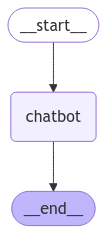

In [10]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
# Importing AIMessage and HumanMessage to represent different types of messages
from langchain_core.messages import AIMessage, HumanMessage

# Defining a function to send user input to the chatbot and process responses
def send_msg(user_input: str):
    # Creating a dictionary with a "messages" key containing a list of HumanMessage objects
    # The content of the HumanMessage is set to the user's input
    messages = {"messages": [HumanMessage(content=user_input)]}
    
    # Streaming events from the graph by providing the user messages as input
    for event in graph.stream(input=messages):
        # Looping through the event's values (responses generated by the assistant)
        for value in event.values():
            # Printing the last message in the list of responses from the assistant
            print("Assistant:", value["messages"][-1].content)

# A continuous loop to interact with the chatbot
def invoke_chat():
    while True:
        try:
            # Asking for user input via the console
            user_input = input("User: ")
            # Checking if the user wants to quit by typing "quit", "exit", or "q"
            if user_input.lower() in ["quit", "exit", "q"]:
                print("Goodbye!")
                break  # Exiting the loop if the user wants to quit
    
            # Sending the user input to the send_msg function to get a response from the chatbot
            send_msg(user_input)
    
        except:
            # Fallback behavior if input() is not available (e.g., in some environments or for testing)
            # In this case, the user input is hardcoded to a specific question
            user_input = "What do you know about LangGraph?"
            print("User: " + user_input)
            # Sending the hardcoded input to the chatbot
            send_msg(user_input)
            break  # Ending the loop after this fallback interaction

In [12]:
invoke_chat()

User:  test


Assistant: It looks like you're testing to see if I'm working properly. Is there anything specific you'd like to chat about or ask for help with? I'm here to assist you!


User:  quit


Goodbye!


## Intent analyzer graph

In [61]:
from langgraph.graph import StateGraph, START, END
from langchain.prompts import PromptTemplate
from pydantic import BaseModel, Field
from typing import TypedDict, List, Dict

# Predefined intent options
INTENT_OPTIONS = ["login", "query", "translate", "summarize", "verify", "analyze", "extract", "calculate"]

# Pydantic Model for enforcing structured output with detailed descriptions
class IntentOutput(BaseModel):
    intents: List[str] = Field(
        ...,  # Required field
        description="An ordered list of user intents chosen from predefined options: "
                    "query, translate, summarize, verify, extract, calculate."
    )
    what: Dict[str, str] = Field(
        ..., 
        description=(
            "Additional details describing what specifically each intent applies to:\n"
            "- login: 'Which credentials to fetch, e.g., api credentials for Twitter'.\n"
            "- query: 'What to query, e.g., population data for France in 2023'.\n"
            "- translate: 'Source and target languages, e.g., from English to French'.\n"
            "- summarize: 'Main subject to summarize, e.g., climate change report'.\n"
            "- verify: 'Facts to check, e.g., GDP accuracy in report'.\n"
            "- extract: 'Entities to extract, e.g., company names or dates'.\n"
            "- calculate: 'Variables and operations, e.g., square root of age of author'."
        )
    )

# Prompt template for classification
INTENT_PROMPT = PromptTemplate(
    input_variables=["message", "options"],
    template=(
        "Analyze the user's message: {message}\n"
        "Classify its intent using these predefined options: {options}.\n"
        "Output a JSON object containing:\n"
        "  1. 'intents': an ordered list of intents.\n"
        "  2. 'what': a dictionary where each intent has specific details.\n"
        "Follow this schema strictly:\n"
        "{{'intents': ['option1', 'option2'], 'what': {{'option1': 'details1', 'option2': 'details2'}}}}"
    ),
)

# Define the graph's state schema
class IntentState(TypedDict):
    message: str
    intents: List[str]  # Ordered list of classified intents
    what: Dict[str, str]  # Details for each intent

# Build the LangGraph
def build_graph():
    # Create the state graph
    graph = StateGraph(IntentState)

    # Node for intent classification
    def classify_intent(state: IntentState):
        # Bind structured output using Pydantic
        structured_model = llm.with_structured_output(IntentOutput)

        # Prepare the prompt for classification
        prompt = INTENT_PROMPT.format(
            message=state["message"],
            options=", ".join(INTENT_OPTIONS)
        )

        # Invoke the model and enforce structured output
        response = structured_model.invoke(prompt)

        # Return the results
        return {"intents": response.intents, "what": response.what}

    # Add nodes and edges to the graph
    graph.add_node("classify", classify_intent)
    graph.add_edge(START, "classify")
    graph.add_edge("classify", END)

    return graph.compile()

# Build and execute the graph
compiled_graph = build_graph()

In [62]:
# Example Input
message = "concerning the story of life of the author of Harry potter, translate this document from English to French and summarize it."
result = compiled_graph.invoke({"message": message})

# Display the result
print(f"Identified intents: {result['intents']}")
print(f"Details (what): {result['what']}")

Identified intents: ['analyze', 'translate', 'summarize']
Details (what): {'analyze': "Analyze the user's message concerning the story of life of the author of Harry Potter.", 'translate': 'Translate the document from English to French.', 'summarize': 'Summarize the document.'}


## Intent analyzer agent

In [63]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    api_key=OPENAI_API_KEY,
    # base_url="...",
    # organization="...",
    # other params...
)

In [64]:
from langgraph.graph import StateGraph, START, END
from langchain.prompts import PromptTemplate
from pydantic import BaseModel, Field
from typing import TypedDict, List, Dict
from langchain.output_parsers import PydanticOutputParser

In [68]:
class IntentStepState(TypedDict):
    order: int  # The execution order for this intent
    intent: str  # The type of intent (e.g., 'action', 'query', 'extract', etc.)
    what: str  # A detailed description of the task
    sources: List[int]  # List of dependencies, referencing previous steps by order number
    inputs: List[str] # Required inputs to execute this step
    outputs: List[str] # Expected outputs generated by this step
    # method: str  # Algorithm, tool, or technique to be used for execution


class IntentState(TypedDict):
    message: str  # Original user query
    intents: List[IntentStepState]  # Ordered list of structured intents
    feedback: str  # Feedback from the critic

In [69]:
class IntentOutputStep(BaseModel):
    order: int = Field(
        ...,
        description=(
            "The execution order of the intent. Must follow sequential numbering."
            "Steps are executed in increasing order, enforcing dependencies."
        )
    )
    intent: str = Field(
        ...,
        description=(
            "The type of intent."
            " Allowed values:"

            "**Login:**"
            "- Read either asking from a humain or by internal database some credentials."
            "- **What:** Which credentials to retrieve to login into a system."
            "- **Example:** 'Retrieve the Twitter API login credentials.'"
            
            "**Action:**"
            "- Prepare environment or tools (e.g., 'Open Twitter')."
            "- **What:** Specify the tool, API, or app to prepare."
            "- **Example:** 'Open Twitter API and authenticate.'"

            "**Query:**"
            "- Retrieve information using predefined tools."
            "- **What:** Specify the data source, target data, and query."
            "- **Example:** 'Fetch the latest tweet from Donald Trump using Twitter API.'"

            "**Extract:**"
            "- Extract structured information from retrieved data."
            "- **What:** Define the data to extract and the format."
            "- **Example:** 'Extract sentiment and keywords from tweet text.'"

            "**Summarize:**"
            "- Condense extracted or queried data into simplified insights."
            "- **What:** Define the summary goal and required format."
            "- **Example:** 'Summarize key points and sentiment trends from the tweet.'"

            "**Translate:**"
            "- Translate extracted or summarized data into another language."
            "- **What:** Specify source, target language, and text."
            "- **Example:** 'Translate extracted sentiment from English to French.'"

            "**Analyze:**"
            "- Process extracted or queried data for insights or patterns."
            "- **What:** Define the method of analysis and expected output."
            "- **Example:** 'Perform NLP sentiment analysis using extracted keywords.'"

            "**Verify:**"
            "- Validate extracted or analyzed data against references."
            "- **What:** Specify the criteria for verification."
            "- **Example:** 'Verify sentiment consistency against stock market trends.'"

            "**Calculate:**"
            "- Perform calculations using pre-defined formulas and variables."
            "- **What:** Define the formula, variables, and output."
            "- **Example:** 'Calculate sentiment score as (positive_weight - negative_weight) / total.'"

            "**Rules:**"
            "- 'extract' MUST depend on 'action' or 'query'."
            "- 'analyze', 'translate', 'verify', 'calculate' MUST depend on prior 'extract' or 'query'."
        )
    )
    what: str = Field(
        ...,
        description=(
            "A detailed description of the task, specifying methods, tools, inputs, outputs, and expected results."
            "- Must clearly state **what** to do, **how** to do it, and expected **outputs**."
            "- Example: 'Extract sentiment and keywords from the tweet text retrieved earlier.'"
        )
    )
    sources: List[int] = Field(
        ...,
        description=(
            "The order number(s) of prior intents this step depends on."
            "- Example: 'extract' (step 3) depends on 'query' (step 2), so sources=[2]."
            "- Supports multiple sources for complex tasks (e.g., 'calculate')."
        )
    )
    inputs: List[str] = Field(
        default=[],
        description=(
            "Explicit input data required to execute this step."
            "- Example for 'calculate': 'sentiment_score', 'tweet_length'."
            "- Example for 'analyze': 'sentiment analysis of inputs'."
        )
    )
    outputs: List[str] = Field(
        default=[],
        description=(
            "Expected outputs generated by this step."
            "- Example for 'extract': 'sentiment', 'keywords'."
            "- Example for 'analyze': 'sentiment_score'."
        )
    )
    # method: str = Field(
    #     ...,
    #     description=(
    #         "The specific method, algorithm, or tool used for execution."
    #         "- Example for 'analyze': 'Sentiment analysis using NLP transformer model.'"
    #         "- Example for 'calculate': 'Sentiment score = sum(positive_weight - negative_weight)'."
    #     )
    # )


class IntentOutput(BaseModel):
    intents: List[IntentOutputStep] = Field(
        ...,
        description=(
            "A structured list of ordered intents with dependencies, inputs, outputs, and methods."
        )
    )

In [70]:
# Use the output parser directly
parser = PydanticOutputParser(pydantic_object=IntentOutput)

# Generate the raw instructions appended to the LLM
schema_instructions = parser.get_format_instructions()

print("=== Schema Instructions Sent to LLM ===")
print(schema_instructions)

=== Schema Instructions Sent to LLM ===
The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"$defs": {"IntentOutputStep": {"properties": {"order": {"description": "The execution order of the intent. Must follow sequential numbering.Steps are executed in increasing order, enforcing dependencies.", "title": "Order", "type": "integer"}, "intent": {"description": "The type of intent. Allowed values:**Login:**- Read either asking from a humain or by internal database some credentials.- **What:** Which credentials to retrieve to login into a system.- **Example:** 'Retrieve the Twitter API login cred

In [71]:
INTENT_PROMPT = PromptTemplate(
    input_variables=["message", "feedback"],
    template=(
        "### User Query:\n"
        "```{message}```\n"

        "### Feedback and Iteration:\n"
        "- Take into account the following **feedback** from the last review:\n"
        "```{feedback}```\n"

        "### Task:\n"
        "Analyze the user's query and classify its intent into steps using the following predefined categories:\n"
        "Break down the query into steps based on these intents:\n"
        "**Allowed Intents:** 'action', 'query', 'extract', 'summarize', 'translate', 'analyze', 'verify', 'calculate'\n"
        
        "### Rules for Output:\n"
        "1. **Order and Dependencies:**\n"
        "- Each intent must have a **sequential order number**.\n"
        "- Higher-order intents ('translate', 'analyze', 'verify', 'calculate') **must depend on prior intents** ('action', 'query', 'extract').\n"
        "- No skipped steps or unordered dependencies.\n"
        "- Provide output as a **JSON object matching the schema**.\n"
        "- Do **not** skip required fields.\n"
        "- Field names are **fixed**—errors will cause rejection.\n"
        "- Respond only with **raw JSON** matching the schema—no extra text, quotes, or formatting.\n"

        "2. **Detailed Instructions for Each Intent:**\n"
        "- 'login': Specify the **exact credentials** to be fetched** (e.g., 'Fetch the Twitter API credentials.').\n"
        "- 'action': Specify the **exact tool** and **environment setup** (e.g., 'Open Twitter and authenticate API.').\n"
        "- 'query': Define the **source**, **data target**, and **retrieval method** (e.g., 'Fetch the latest tweet from Twitter API.').\n"
        "- 'extract': Specify **what data** to extract, **where from**, and **format** (e.g., 'Extract sentiment from tweet text.').\n"
        "- 'summarize': Define **what to summarize** and expected **level of detail**.\n"
        "- 'translate': Specify **source text**, **target language**, and **method**.\n"
        "- 'analyze': Define **type of analysis**, **inputs**, and **outputs** (e.g., 'Perform NLP sentiment analysis.').\n"
        "- 'verify': Specify **data to verify** and **comparison criteria**.\n"
        "- 'calculate': Define **formula**, **variables**, and **expected output** (e.g., 'Calculate average sentiment score.').\n\n"

        "3. **Inputs, Outputs, and Methods:**\n"
        "- Each intent must define **inputs** and **outputs** (e.g., 'inputs': ['tweet_text'], 'outputs': ['sentiment_score']).\n"
        # "- Each intent must specify a **method** (e.g., 'Sentiment analysis using transformer model').\n\n"
    )
)

In [72]:
class FeedbackDetail(BaseModel):
    check: str = Field(
        ...,
        description="The name of the validation check that failed or passed (e.g., 'Relevance Check')."
    )
    status: str = Field(
        ...,
        description="The status of the check—either 'passed' or 'failed'."
    )
    reason: str = Field(
        default="",
        description="Explanation for why the check failed (if applicable) and how to fix it."
    )


class CriticOutput(BaseModel):
    status: str = Field(
        ...,
        description="Overall status of the evaluation—either 'approved' or 'rejected'."
    )
    feedback: List[FeedbackDetail] = Field(
        ...,
        description="A list of detailed feedback for each validation check."
    )

In [73]:
# Use the output parser directly
parser = PydanticOutputParser(pydantic_object=CriticOutput)

# Generate the raw instructions appended to the LLM
schema_instructions = parser.get_format_instructions()

print("=== Schema Instructions Sent to LLM ===")
print(schema_instructions)

=== Schema Instructions Sent to LLM ===
The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"$defs": {"FeedbackDetail": {"properties": {"check": {"description": "The name of the validation check that failed or passed (e.g., 'Relevance Check').", "title": "Check", "type": "string"}, "status": {"description": "The status of the check—either 'passed' or 'failed'.", "title": "Status", "type": "string"}, "reason": {"default": "", "description": "Explanation for why the check failed (if applicable) and how to fix it.", "title": "Reason", "type": "string"}}, "required": ["check", "status"], "title": 

In [125]:
CRITIC_PROMPT = PromptTemplate(
    input_variables=["intents", "message"],
    template=(
        "### User Query:\n"
        "```{message}```\n\n"

        "### Intent Review:\n"
        "Intents Provided: ```{intents}```\n\n"

        "### Task:\n"
        "Evaluate the provided intents based on the following **validation checks**. For each check, determine:\n"
        "- **Status:** 'passed' or 'failed'.\n"
        "- **Reason:** If failed, explain why and how to fix it.\n\n"

        "**Validation Checks:**\n"

        "**0. General Rules:**\n"
        "- **DON'T BE TOO PEDANTIC**. Each intent is designed for either a **human or a highly capable execution agent**. The goal is to break down the task into actionable steps, **not** to over-specify trivial details.\n"
        "- Assume that the execution agent can **infer obvious details** unless ambiguity **prevents execution**.\n\n"

        "**1. Relevance Check:**\n"
        "- Confirm that the chain of intents **directly contributes** to fulfilling the query.\n"
        "- **Fail only if** an intent is **completely unrelated** to the task.\n\n"

        "**2. Dependency Validation:**\n"
        "- Verify that higher-order intents ('translate', 'analyze', 'verify', 'calculate') **depend on prior steps** ('action', 'query', 'extract').\n"
        "- Ensure all intents list **sources** referencing earlier steps.\n"
        "- **Allow implicit dependencies** if the connection is obvious.\n"
        "- **Fail only if** required dependencies are **missing or unordered**, making execution **impossible**.\n\n"

        "**3. Intent Order Check:**\n"
        "- Confirm that intents are **logically sequenced**.\n"
        "- **Minor reordering issues should not cause failure** unless they break execution.\n"
        "- **Fail only if** an intent appears **before its required input is generated**.\n\n"

        "**4. Clarity and Specificity Check:**\n"
        "- The instruction should be **understandable and executable** by an intelligent agent.\n"
        "- Accept **reasonable general descriptions** (e.g., 'Summarize report' is fine if summarization is implied in context).\n"
        "- **Fail only if**:\n"
        "  - The intent is **too vague** for a smart agent to understand.\n"
        "  - Inputs/outputs are **completely missing**, making execution **impossible**.\n"
        "  - There is an **actual ambiguity** preventing an agent from taking action.\n\n"

        "**5. Data Flow Validation:**\n"
        "- Confirm that **inputs match outputs** of referenced sources.\n"
        "- Allow **reasonable implicit references** (e.g., if 'report_text' flows into 'resume_text', no need to over-specify).\n"
        "- **Fail only if**:\n"
        "  - An input is **completely missing** and cannot be inferred from prior steps.\n"
        "  - The intent **skips necessary steps**, making execution **incoherent**.\n\n"

        "### Feedback Requirements:\n"
        "- Respond with **structured feedback** for each check, indicating:\n"
        "  1. **Status** ('passed' or 'failed').\n"
        "  2. **Reason** for failure (if applicable) and suggestions for fixes.\n"
        "- **Approve the intent chain** if **all checks pass** OR **minor issues are non-blocking**.\n"
        "- **Reject only if execution would fail due to major gaps or inconsistencies**.\n"
        "- Use **natural language explanations only**—do **not generate code**.\n"
    )
)

In [126]:
# Build the LangGraph
def build_graph():
    # Create the state graph
    graph = StateGraph(IntentState)

    # Node for intent classification
    def classify_intent(state: IntentState):
        print("Agent: Classify Intent - Processing input message...")
    
        # Bind structured output using the updated Pydantic model
        classify_structured_model = llm.with_structured_output(IntentOutput)
    
        # Prepare the prompt for classification
        prompt = INTENT_PROMPT.format(
            message=state["message"],
            feedback=state.get("feedback", "no previous feedback."),
        )
    
        # Invoke the model and enforce structured output
        response = classify_structured_model.invoke(prompt)
        print(response)
    
        # Extract intents and prepare the response
        intents = []
        for step in response.intents:  # Updated to loop through the structured intents
            intents.append({
                "order": step.order,
                "intent": step.intent,
                "what": step.what,
                "sources": step.sources,
                "inputs": step.inputs,
                "outputs": step.outputs,
                # "method": step.method
            })
    
        # Log the extracted intents
        print(f"Agent: Classify Intent - Intents: {intents}")
    
        # Return structured output compatible with the updated IntentState
        return {"intents": intents}


    # Node for critic evaluation
    def critic_agent(state: IntentState):
        print("Agent: Critic - Evaluating intents and dependencies...")
    
        # Prepare the critic prompt
        critic_prompt = CRITIC_PROMPT.format(
            intents=state["intents"],
            message=state["message"]
        )
    
        # Enforce structured output using the CriticOutput model
        critic_structured_model = llm.with_structured_output(CriticOutput)
    
        # Get response from the critic model
        response = critic_structured_model.invoke(critic_prompt)
            
        # Log the results
        print(f"Agent: Critic - Status: {response.status}")
        for feedback in response.feedback:
            print(f"Check: {feedback.check}, Status: {feedback.status}, Reason: {feedback.reason}")
    
        # Process results
        if response.status == "approved":
            return {"feedback": "approved"}  # Approved, exit the loop
        else:
            # Construct detailed feedback for refinement
            feedback_summary = "\n".join(
                [f"{fb.check}: {fb.reason}" for fb in response.feedback if fb.status == "failed"]
            )
            return {"feedback": feedback_summary}  # Return feedback for refinement


    # Add nodes and edges to the graph
    graph.add_node("classify", classify_intent)
    graph.add_node("critic", critic_agent)

    # Define edges with feedback tracking in the state
    graph.add_edge(START, "classify")
    graph.add_edge("classify", "critic")
    graph.add_conditional_edges(
        "critic",
        lambda state: "approved" if state["feedback"] == "approved" else "classify",
        {"approved": END, "classify": "classify"}
    )

    return graph.compile()


# Compile the agentic system
compiled_graph = build_graph()

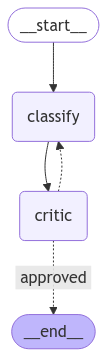

In [127]:
from IPython.display import Image, display
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

In [135]:
def process_intent_agent():
    # Initialize the input state based on the updated schema
    initial_state = {
        "message": message,
        "intents": [],    # Empty initial intents
        "feedback": ""    # Empty initial feedback
    }
    
    # Invoke the compiled graph
    result = compiled_graph.invoke(initial_state)
    
    # Display the final result
    print("\n===== Final Results =====")
    
    # Print extracted intents
    print("\n--- Identified Intents ---")
    for intent in result['intents']:
        print(f"Order: {intent['order']}")
        print(f"Intent: {intent['intent']}")
        print(f"What: {intent['what']}")
        print(f"Sources: {intent['sources']}")
        print(f"Inputs: {intent['inputs']}")
        print(f"Outputs: {intent['outputs']}")
        # print(f"Method: {intent['method']}")
        print("-" * 30)
    
    # Print critic feedback
    print("\n--- Critic Feedback ---")
    if isinstance(result['feedback'], str):
        # Plain text feedback
        print(result['feedback'])
    else:
        # Structured feedback
        print(f"Status: {result['feedback']['status']}")
        print("\nDetailed Feedback:")
        for fb in result['feedback']['feedback']:
            print(f"Check: {fb['check']}")
            print(f"Status: {fb['status']}")
            print(f"Reason: {fb['reason']}")
            print("-" * 30)


In [138]:
# Test run
message = "Process the latests Tweets from Emmanuel Macron about cryptos by summarizing theirs sentiments and emailing them to contact@bbschool.fr."
process_intent_agent()

Agent: Classify Intent - Processing input message...
intents=[IntentOutputStep(order=1, intent='login', what="Fetch the Twitter API credentials to access Emmanuel Macron's tweets.", sources=[], inputs=[], outputs=['twitter_api_credentials']), IntentOutputStep(order=2, intent='action', what='Open Twitter API and authenticate using the fetched credentials.', sources=[1], inputs=['twitter_api_credentials'], outputs=['authenticated_twitter_api']), IntentOutputStep(order=3, intent='query', what='Fetch the latest tweets from Emmanuel Macron about cryptos using the authenticated Twitter API.', sources=[2], inputs=['authenticated_twitter_api'], outputs=['emmanuel_macron_crypto_tweets']), IntentOutputStep(order=4, intent='extract', what='Extract the text and metadata from the fetched tweets.', sources=[3], inputs=['emmanuel_macron_crypto_tweets'], outputs=['tweet_texts', 'tweet_metadata']), IntentOutputStep(order=5, intent='analyze', what='Perform sentiment analysis on the extracted tweet texts

# Exemples LangSmith et Langraph Studio

Reset votre kernel ici pour permettre à Langchain et Langsmith de se configurer pour l'usage de votre instance hébérgée de LangSmith.

In [1]:
from dotenv import load_dotenv
import os

# Load environment variables from the custom file
load_dotenv("config.env")

True

In [2]:
# Retrieve and store the variables exactly as named
LANGCHAIN_ENDPOINT = os.getenv("LANGCHAIN_ENDPOINT")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGSMITH_API_KEY = os.getenv("LANGSMITH_API_KEY")
LANGCHAIN_PROJECT = os.getenv("LANGCHAIN_PROJECT")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
NGROK_AUTHTOKEN = os.getenv("NGROK_AUTHTOKEN")
NGROK_SUBDOMAIN = os.getenv("NGROK_SUBDOMAIN")

In [3]:
import openai

from langsmith import Client, tracing_context, traceable
from langsmith.wrappers import wrap_openai

from langchain_ollama import ChatOllama
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain.output_parsers import PydanticOutputParser

from pydantic import BaseModel, Field

In [4]:
# Initialisation du client LangSmith
from langsmith import Client

client = Client()

url = next(client.list_runs(project_name="test")).url
print(url)

https://smith.langchain.com/o/74691241-c822-4de0-ae26-8753e737cc9c/projects/p/e4c4c688-6469-4614-b74c-314d8e6f6ad6/r/049ae34c-d4e2-418b-ab10-c9288a3733ab?trace_id=1a7e5193-8796-488b-ba64-24966692448d&start_time=2025-03-01T18:06:51.993475


In [5]:
# Initializing a language model (LLM) using the ChatOllama class
# temperature is set to 0, meaning deterministic responses with no randomness
target_llm = ChatOllama(model="llama3.2", temperature=0, max_retries=2)

In [6]:
ext_llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_retries=2,
    api_key=OPENAI_API_KEY
)

In [7]:
# Avec un client ollama compatible OpenAI API
# openai_llm = openai.Client(
#     api_key="ollama", 
#     base_url="http://localhost:11434/v1"
# )

## Une première trace

In [8]:
# Avec le client de Langchain

ext_llm.invoke("Hello, world!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 11, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-c0d884b4-730c-4bff-ac36-d6f1ddbda81e-0', usage_metadata={'input_tokens': 11, 'output_tokens': 10, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
# Avec le client de OpenAI
openai_llm = openai.Client(
    api_key=OPENAI_API_KEY
)
wrapped_openai_client = wrap_openai(openai_llm)

@traceable # Auto-trace this function
def pipeline(user_input: str):
    result = wrapped_openai_client.chat.completions.create(
        messages=[{"role": "user", "content": user_input}],
        model="gpt-4o-mini"
    )
    return result.choices[0].message.content

pipeline("Bonjour les apprenants de la BBS!")

"Bonjour! Comment puis-je vous aider aujourd'hui? Que souhaitez-vous apprendre ou discuter?"

## Une évaluation

### Un dataset

In [ ]:
# 📚 Création du dataset pour des tests de question/réponse
dataset = langsmith_client.create_dataset(
    "BBS_QA_Dataset",
    description="Exemples de questions et réponses pour la Blockchain Business School, incluant les programmes en IA depuis 2024.",
)

# 🌟 Ajout d'exemples dans le dataset
langsmith_client.create_examples(
    inputs=[
        {"question": "Qu'est-ce que la Blockchain Business School?"},
        {"question": "Quels sont les programmes proposés par la BBS?"},
        {"question": "Depuis quand la BBS propose-t-elle des programmes en IA?"},
        {"question": "Comment postuler à la Blockchain Business School?"},
    ],
    outputs=[
        {"answer": "La Blockchain Business School est un établissement dédié à l'enseignement des technologies blockchain et des modèles économiques décentralisés."},
        {"answer": "La BBS propose des programmes sur la blockchain, la tokenisation, les smart contracts, la finance décentralisée, ainsi que sur l'intelligence artificielle depuis 2024."},
        {"answer": "La BBS propose des programmes en intelligence artificielle depuis 2024, en complément de ses cursus sur la blockchain."},
        {"answer": "Pour postuler, rendez-vous sur le site officiel de la Blockchain Business School et suivez les instructions d'inscription."},
    ],
    dataset_id=dataset.id,
)

print("Dataset créé 🎉 Les questions/réponses sont disponibles dans LangSmith!")

### Un scenario

In [ ]:
# Fonction principale pour gérer les requêtes utilisateur
def target(inputs: dict) -> dict:
    # Historique en dur intégré dans les messages
    messages = [
        SystemMessage(content="Répondez aux questions avec précision en tenant compte de l'historique."),
        HumanMessage(content="Qu'est-ce que la Blockchain Business School?"),
        AIMessage(content="La Blockchain Business School est un établissement dédié à l'enseignement des technologies blockchain."),
        HumanMessage(content="Quels sont les programmes proposés par la BBS?"),
        AIMessage(content="La BBS propose des programmes sur la blockchain et l'intelligence artificielle depuis 2024."),
        # Ajout de la question actuelle
        HumanMessage(content=inputs["question"]),
    ]

    # Préparer le prompt avec le template LangChain
    prompt = ChatPromptTemplate.from_messages(messages)

    # Appel au modèle
    response = target_llm.invoke(prompt.format())

    # Retourne la réponse
    return {"response": response.content.strip()}


In [ ]:
# target({"question": "Depuis quand la BBS propose-t-elle des programmes en IA?"})

### Un juge

Pour ajouter du "impartiel", nous allons utiliser ChatGPT pour evaluer notre modèle Ollama.

In [ ]:
# Define Output Schema
class Grade(BaseModel):
    score: bool = Field(
        description="Boolean indicating whether the response is conceptually accurate relative to the reference."
    )

# Enable Structured Output Parsing
structured_llm = ext_llm.with_structured_output(Grade)

# Define Evaluation Function
def accuracy(outputs: dict, reference_outputs: dict) -> bool:
    # Instructions intégrées
    instructions = """
    Évaluez la réponse donnée par le Target par rapport à la Réponse de Référence pour vérifier la similarité conceptuelle et classifiez comme vrai ou faux :
    - Faux : Aucun lien conceptuel ou similarité.
    - Vrai : Correspondance conceptuelle partielle ou totale.
    - Critères clés : Les concepts doivent correspondre, même si la formulation est différente.
    """

    # Préparer la requête
    prompt = f"""
    {instructions}

    Réponse de Référence : {reference_outputs['answer']}
    Réponse du Target : {outputs['response']}
    """

    # Appel au modèle avec sortie structurée
    try:
        response = structured_llm.invoke(prompt)
        return response.score
    except Exception as e:
        print(f"Erreur de parsing : {e}")
        return False


In [ ]:
accuracy({"response": "La BBS propose des programmes sur la blockchain et l'intelligence artificielle depuis 2024."}, {"answer": "La BBS enseigne la blockchain et l'IA depuis 2024."})

### Une expérience

Il s'agit en fait d'une évaluation sur un dataset avec un juge

In [ ]:
# After running the evaluation, a link will be provided to view the results in langsmith
from langsmith import evaluate

experiment_results = evaluate(
  target,
  data="BBS_QA_Dataset",
  evaluators=[
      accuracy,
      # can add multiple evaluators here
  ],
  experiment_prefix="ma-première-xp",
  max_concurrency=2,
)

## Langraph Studio

Langraph Studio est un utilitaire qui nous permet de tester en conditions reèlle le fonctionnement de nos pipelines (input->graph->state->résultat).
Pour établir un environnement de validation E2E (end-to-end), nous devons déclarer et construir un environnement de deploiement indépendant de notre environnement de développement.

### Préparer le projet de debug

In [ ]:
from dotenv import load_dotenv
import os

# Load environment variables from the custom file
load_dotenv("config.env")

In [19]:
import pkg_resources
import os

def generate_requirements(output_file="requirements.txt"):
    # Get all installed packages and their versions
    installed_packages = pkg_resources.working_set
    # packages = sorted([f"{pkg.key}=={pkg.version}" for pkg in installed_packages])
    packages = sorted([f"{pkg.key}" for pkg in installed_packages])

    try:
        # Write to the requirements.txt file
        with open(output_file, "w") as file:
            file.write("\n".join(packages))
        print(f"Successfully generated '{output_file}' with all installed packages and versions.")
    except IOError as e:
        print(f"Failed to write requirements to '{output_file}': {e}")

# Run the function
generate_requirements()

Successfully generated 'requirements.txt' with all installed packages and versions.


In [20]:
import json

def write_langgraph_json():
    # Contenu du fichier
    data = {
        "dependencies": ["."],
        "graphs": {},
        "env": "config.env"
    }
    
    # Écriture dans le fichier langgraph.json
    with open('langgraph.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)
    print(f"Fichier 'langgraph.json' écrit avec succès.")

# Initialisation du script 
write_langgraph_json()

Fichier 'langgraph.json' écrit avec succès.


#### Export du code source à débug

In [21]:
import ast
from typing import Set, Dict, List

def gather_notebook_source():
    ip = get_ipython()
    if ip is None or not hasattr(ip, 'user_ns'):
        raise RuntimeError("This script must be executed from a Jupyter Notebook.")
    notebook_cells = ip.user_ns.get('In', [])
    return "\n".join(notebook_cells)


def export_notebook_function(entry_point, graph_name):
    """
    Exports a specified object or function and its dependencies from a Jupyter Notebook to a standalone Python file.
    Updates the `langgraph.json` file to include the new function.

    Args:
        entry_point (str, object, or callable): The name, reference of the object, or function to export.
        output_file (str, optional): The name of the output Python file. If not provided, it will be derived from the entry_point name.
    """
    # Step 1: Gather notebook source code
    source_code = gather_notebook_source()
    try:
        module_ast = ast.parse(source_code)
    except SyntaxError as e:
        raise RuntimeError(f"Failed to parse notebook source: {e}")

    top_level_nodes = module_ast.body
    symbol_table = build_symbol_table(top_level_nodes)

    # Step 2: Determine the entry point name
    if isinstance(entry_point, str):
        entry_point_name = entry_point
    elif callable(entry_point):
        entry_point_name = entry_point.__name__
    elif hasattr(entry_point, '__class__') and hasattr(entry_point.__class__, '__name__'):
        entry_point_name = entry_point.__class__.__name__
    else:
        raise TypeError("entry_point must be a string, callable, or object with a class name.")

    # Derive output file name if not provided
    output_file = f"{entry_point_name}.py"

    # Step 3: Perform dependency analysis
    dependencies = collect_dependencies(entry_point_name, symbol_table, top_level_nodes)
    imports = collect_imports(top_level_nodes, dependencies)
    cleaned_imports = deduplicate_imports(imports, list(dependencies))
    ordered_dependencies = order_dependencies(dependencies, top_level_nodes)
    reconstructed_code = reconstruct_code(cleaned_imports + ordered_dependencies)

    # Step 4: Write the reconstructed code to the output file
    graph_folder = f"./{graph_name}"
    output_path = os.path.join(graph_folder, output_file)
    init_file_path = os.path.join(graph_folder, "__init__.py")
    try:
        # Ensure the directory exists
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        
        # Write to the file
        with open(output_path, 'w') as file:
            file.write(reconstructed_code)

        # Write the __init__.py file
        with open(init_file_path, 'w') as init_file:
            init_file.write(f"from .{output_file} import {graph_name}\n\n")
            init_file.write(f'__all__ = ["{graph_name}"]\n\n')
            init_file.write(f'__version__ = "0.0.1"\n\n')
            
    except IOError as e:
        raise RuntimeError(f"Failed to write to file '{output_path}': {e}")
    print(f"Exported successfully to {output_path}")

    # Step 5: Update langgraph.json
    langgraph_file = "langgraph.json"
    try:
        if os.path.exists(langgraph_file):
            with open(langgraph_file, 'r') as json_file:
                langgraph_data = json.load(json_file)
        else:
            langgraph_data = {"dependencies": ["."], "graphs": {}, "env": ".env"}

        # Add or update the entry in "graphs"
        langgraph_data["graphs"][entry_point_name] = f"./{graph_name}/{output_file}:{graph_name}"

        with open(langgraph_file, 'w') as json_file:
            json.dump(langgraph_data, json_file, indent=4)
        print(f"Updated '{langgraph_file}' with new entry for '{entry_point_name}'.")
    except IOError as e:
        raise RuntimeError(f"Failed to update '{langgraph_file}': {e}")


def build_symbol_table(nodes: List[ast.AST]) -> Dict[str, ast.AST]:
    symbol_table = {}
    for node in nodes:
        if isinstance(node, (ast.FunctionDef, ast.ClassDef)):
            symbol_table[node.name] = node
        elif isinstance(node, ast.Assign):
            for target in node.targets:
                if isinstance(target, ast.Name):
                    symbol_table[target.id] = node
        elif isinstance(node, (ast.Import, ast.ImportFrom)):
            symbol_table[f"import_{len(symbol_table)}"] = node
    return symbol_table


def collect_dependencies(obj_name: str, symbol_table: Dict[str, ast.AST], 
                         top_level_nodes: List[ast.AST],
                         visited: Set[str] = None) -> Set[ast.AST]:
    """
    Recursively collects all dependencies for a given object, including global method calls.
    """
    if visited is None:
        visited = set()

    if obj_name in visited:
        return set()
    visited.add(obj_name)

    obj_node = symbol_table.get(obj_name)
    if not obj_node:
        raise RuntimeError(f"Object '{obj_name}' not found in symbol table.")

    dependencies = {obj_node}

    # Collect all names used in the object's definition
    used_names = {node.id for node in ast.walk(obj_node) if isinstance(node, ast.Name)}

    # Include relevant global method calls
    for node in top_level_nodes:
        if isinstance(node, ast.Expr) and isinstance(node.value, ast.Call):
            call_obj = node.value.func
            # Check if the method call uses known symbols (functions or variables)
            if isinstance(call_obj, ast.Name) and call_obj.id == obj_name:
                dependencies.add(node)
            elif isinstance(call_obj, ast.Attribute) and isinstance(call_obj.value, ast.Name):
                if call_obj.value.id == obj_name:
                    dependencies.add(node)
            # Add arguments that reference known symbols
            for arg in node.value.args:
                if isinstance(arg, ast.Name) and arg.id in symbol_table:
                    dependencies.update(collect_dependencies(arg.id, symbol_table, top_level_nodes, visited))

    # Collect dependencies of the used names
    for name in used_names:
        if name in symbol_table:
            dependencies.update(collect_dependencies(name, symbol_table, top_level_nodes, visited))

    return dependencies


def collect_imports(top_level_nodes: List[ast.AST], dependencies: Set[ast.AST]) -> List[ast.AST]:
    imports = []
    for node in top_level_nodes:
        if isinstance(node, (ast.Import, ast.ImportFrom)):
            imports.append(node)
    return imports


def deduplicate_imports(imports: List[ast.AST], dependencies: List[ast.AST]) -> List[ast.AST]:
    used_symbols = set()
    for dep in dependencies:
        for node in ast.walk(dep):
            if isinstance(node, ast.Name):
                used_symbols.add(node.id)

    import_statements = set()
    from_imports = {}

    for node in imports:
        if isinstance(node, ast.Import):
            for alias in node.names:
                if alias.asname:
                    if alias.asname in used_symbols:
                        import_statements.add(f"import {alias.name} as {alias.asname}")
                elif alias.name.split('.')[0] in used_symbols:
                    import_statements.add(f"import {alias.name}")
        elif isinstance(node, ast.ImportFrom):
            module = node.module
            for alias in node.names:
                if alias.asname:
                    if alias.asname in used_symbols:
                        if module not in from_imports:
                            from_imports[module] = set()
                        from_imports[module].add(f"{alias.name} as {alias.asname}")
                elif alias.name in used_symbols:
                    if module not in from_imports:
                        from_imports[module] = set()
                    from_imports[module].add(alias.name)

    deduplicated_imports = []

    for statement in sorted(import_statements):
        deduplicated_imports.append(ast.parse(statement).body[0])

    for module, names in sorted(from_imports.items()):
        import_line = f"from {module} import {', '.join(sorted(names))}"
        deduplicated_imports.append(ast.parse(import_line).body[0])

    return deduplicated_imports


def order_dependencies(dependencies: Set[ast.AST], top_level_nodes: List[ast.AST]) -> List[ast.AST]:
    return [node for node in top_level_nodes if node in dependencies]


def reconstruct_code(nodes: List[ast.AST]) -> str:
    try:
        return "\n".join(ast.unparse(node) for node in nodes)
    except AttributeError:
        raise RuntimeError("This script requires Python 3.9 or later to use 'ast.unparse'.")


# Example usage:
# export_notebook_function(invoke_chat, "agent.py")

In [22]:
export_notebook_function(invoke_chat, 'graph')

Exported successfully to ./graph/invoke_chat.py
Updated 'langgraph.json' with new entry for 'invoke_chat'.


### Configurer LangraphStudio

Voir le notebook SetupBBS.ipynb

In [22]:
!curl --request GET --url 0.0.0.0:2024/ok

{"ok":true}

# RAG

Un Retrieval Augmented Generation est un système complèxe composé de trois stades: ingestion -> recupération -> restitution.  

Il est important de noter que, sauf si vous avez implementé une logique différent, l'utilisateur intéragis avec le moteur de recherche (et pas avec le modèle de language directement) donc les résultats sont proches de ce l'utilisateur recherche. S'il est possible d'ajouter de l'intélligence (comme avec un prototype de analyser d'intention pour ventiler les responsabilités), cette comportement sera à la résponsabilité du développeur de le rendre possible.  

Dans ce chapitre, je vous propose plusieurs implementations, les une plus complèxe que l'autre qui par contre necessitent progressivemment de plus de puissance de calcul, plus de crédits et plus de temps pour fonctionner. Il sera de votre ressort de les évaluer de la pertinence à vos besoins.

## RAG niveau 1

Cette implémentation propose une **organisation modulaire** d’un pipeline **Retrieval-Augmented Generation (RAG)** en utilisant **Langraph** et une **classe Pydantic State** pour structurer les flux de données.  

##### Pourquoi cette approche ?
✅ **Modularité** : Chaque agent a une responsabilité spécifique (ingestion, récupération, restitution).  
✅ **Utilisation de Langraph** : Permet de structurer le pipeline sous forme de graphe d’exécution.  
✅ **Centralisation de l’état** : Grâce à une classe `RAGState`, toutes les étapes partagent leurs données de manière fluide.  
✅ **Extensibilité** : Facile à enrichir avec de nouvelles fonctionnalités (ex: feedback loop, post-traitement, analyse sémantique avancée).

---

#### 🏗️ Organisation du pipeline

Ce **pipeline RAG** est structuré autour de **trois agents** :

1. **📥 IngestionAgent**  
   - Charge un document depuis une URL.  
   - Effectue une segmentation en morceaux exploitables.  
   - Crée un index vectoriel pour la récupération d’informations.

2. **🔍 RetrievalAgent**  
   - Crée un index vectoriel pour la récupération d’informations.
   - Recherche les documents les plus pertinents en fonction de la requête.  
   - Formate les résultats pour qu'ils soient compréhensibles par le modèle de langage.

4. **📝 RestitutionAgent**  
   - Utilise un modèle **GPT-3.5-turbo** pour générer une réponse basée sur le contexte récupéré.  
   - Retourne une réponse structurée et optimisée.

---

#### ⚙️ Technologies utilisées

| 📌 Technologie | 🔎 Rôle |
|--------------|------------|
| **Langchain** | Gestion de la récupération et de la génération de texte |
| **Langraph** | Organisation du pipeline sous forme de graphe |
| **Pydantic** | Définition et validation des états de l’application |
| **ChromaDB** | Stockage et recherche des embeddings |
| **OpenAI API** | Modèle LLM pour la génération |

---

#### 📌 Structure du Code

Le pipeline est construit sous la forme d’un **graphe d’agents**, où chaque étape suit un ordre logique :

1️⃣ **Ingestion** → 2️⃣ **Récupération** → 3️⃣ **Restitution**  

Le graphe est ensuite compilé et exécuté pour traiter une requête utilisateur.

#### 🚀 Vos exércises

📌 **Ajout d'un feedback loop** pour affiner les résultats avec les retours utilisateurs.  
📌 **Extension à plusieurs sources de données** (fichiers PDF, bases de connaissances internes, API externes).  
💡 **À vous de jouer !** Expérimentez et adaptez cette implémentation selon vos besoins.

In [9]:
from typing import List, Optional
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph
from pydantic import BaseModel
import bs4

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [10]:
target_llm = ChatOllama(model="llama3.2", temperature=0, max_retries=2)
target_embedding = OllamaEmbeddings(model='nomic-embed-text')

In [11]:
#### 🏗️ Définition de l'état global ####
class RAGState(BaseModel):
    query: str
    sources: List[str]
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[str]] = None
    answer: Optional[str] = None

In [12]:
#### 📥 Agent d'Ingestion ####
def ingestion_agent(state: RAGState) -> RAGState:
    loader = WebBaseLoader(
        web_paths=state.sources
    )
    docs = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
    splits = text_splitter.split_documents(docs)

    # On retourne l'état avec le retriever prêt à l'emploi
    return {"available_docs": len(docs), "ingested": splits}

In [13]:
#### 🔍 Agent de Récupération ####
def retrieval_agent(state: RAGState) -> RAGState:
    if not state.available_docs > 0:
        raise ValueError("Aucun document indexé !")

    vectorstore = Chroma.from_documents(documents=state.ingested, embedding=target_embedding)
    retriever = vectorstore.as_retriever()
    docs = retriever.get_relevant_documents(state.query)
    formatted_docs = "\n\n".join(doc.page_content for doc in docs)

    return {"retrieved_docs": [formatted_docs]}

In [14]:
#### 📝 Agent de Restitution ####
def restitution_agent(state: RAGState) -> RAGState:
    if not state.retrieved_docs:
        raise ValueError("Aucun document récupéré !")

    prompt_template = ChatPromptTemplate.from_template("""
    Répondez à la question en utilisant uniquement le contexte suivant :
    {context}

    Question : {question}
    """)
    chain = prompt_template | target_llm | StrOutputParser()
    response = chain.invoke({"context": state.retrieved_docs[0], "question": state.query})

    return {"answer": response}

In [15]:
#### 📌 Construction du graphe ####
graph = StateGraph(RAGState)

# Ajout des agents
graph.add_node("ingestion", ingestion_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)

# Connexion des étapes
graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "retrieval")
graph.add_edge("retrieval", "restitution")

# Exécution du pipeline
executor = graph.compile()

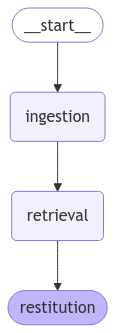

In [16]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [17]:
#### 🚀 Test du RAG organisé avec Langraph ####
query = "Comment utiliser un tool in LangChain?"
source= "https://github.com/P2Enjoy/academy-tutorial-python/blob/main/rag/rag/04-explain-langchain.md"
result = executor.invoke(RAGState(query=query, sources=[source]))

print("💬 Réponse :", result['answer'])

/tmp/ipykernel_2414425/910376582.py:8: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(state.query)


💬 Réponse : Pour utiliser un outil dans LangChain, vous devez d'abord créer un objet de base de données et un modèle de langage (LLM) ou de chat pour initialiser le QuerySQLCheckerTool. Voici comment procéder :

1. Créez un objet SQLDatabase en utilisant la classe `SQLDatabase` fournie par LangChain Community Utilities :
```python
from langchain_community.utilities.sql_database import SQLDatabase

# Créez un objet SQLDatabase
db = SQLDatabase()
```
2. Configurez l'objet de base de données avec les informations de connexion à votre base de données SQLite :
```python
# Configurez l'objet de base de données
db.configure(
    host='localhost',
    database='mon_base_de_donnees',
    user='mon_utilisateur',
    password='mon_mot_de_passe'
)
```
3. Créez un objet QuerySQLCheckerTool en utilisant le modèle de langage (LLM) ou de chat :
```python
from langchain.hub import create_tool

# Créez un objet QuerySQLCheckerTool
tool = create_tool('QuerySQLCheckerTool')
```
4. Utilisez l'outil pour év

## RAG niveau 2 avec MultiQuery

Cette implémentation propose une **organisation modulaire avancée** d'un pipeline **Retrieval-Augmented Generation (RAG)** en utilisant **Langraph**, des **classes Pydantic State** pour structurer les flux de données, et une **stratégie MultiQuery** pour améliorer la qualité des résultats.

##### Pourquoi cette approche ?
✅ **Modularité** : Chaque agent a une responsabilité spécifique (ingestion, multiquery, récupération, restitution).  
✅ **Utilisation de Langraph** : Permet de structurer le pipeline sous forme de graphe d'exécution.  
✅ **Centralisation de l'état** : Grâce à des classes Pydantic (`RAGState`, `MultiQueryOutput`, `ResponseFormatter`), toutes les étapes partagent leurs données de manière structurée.  
✅ **Robustesse** : Utilisation de sorties structurées pour chaque étape du pipeline.  
✅ **Amélioration de la récupération** : Stratégie MultiQuery pour obtenir des résultats plus complets et pertinents.

---

#### 🏗️ Organisation du pipeline

Ce **pipeline RAG** est structuré autour de **quatre agents** :

1. **📥 IngestionAgent**  
   - Charge un document depuis une URL.  
   - Effectue une segmentation en morceaux exploitables.  
   - Prépare les documents pour l'indexation vectorielle.

2. **🎯 MultiQueryAgent**  
   - Génère 3 à 5 variations de la question originale.  
   - Fournit un raisonnement explicite pour chaque variation.  
   - Utilise une sortie structurée (`MultiQueryOutput`) pour garantir la qualité.

3. **🔍 RetrievalAgent**  
   - Crée un index vectoriel avec ChromaDB.
   - Recherche les documents pertinents pour chaque variation de requête.  
   - Déduplique et consolide les résultats.

4. **📝 RestitutionAgent**  
   - Utilise un modèle LLM pour générer une réponse basée sur le contexte enrichi.  
   - Retourne une réponse structurée (`ResponseFormatter`) avec sources.

---

#### ⚙️ Technologies utilisées

| 📌 Technologie | 🔎 Rôle |
|--------------|------------|
| **Langchain** | Gestion de la récupération et de la génération de texte |
| **Langraph** | Organisation du pipeline sous forme de graphe |
| **Pydantic** | Définition et validation des états et sorties structurées |
| **ChromaDB** | Stockage et recherche des embeddings |
| **Ollama** | Modèle LLM local pour la génération |

---

#### 📌 Structure du Code

Le pipeline est construit sous la forme d'un **graphe d'agents**, avec un flux enrichi :

1️⃣ **Ingestion** → 2️⃣ **MultiQuery** → 3️⃣ **Récupération** → 4️⃣ **Restitution**

#### 🔍 Sorties Structurées

Le pipeline utilise trois classes Pydantic principales :

1. **MultiQueryOutput**
   ```python
   class MultiQueryOutput(BaseModel):
       queries: List[str]      # Liste des variations de requêtes
       reasoning: str          # Explication du raisonnement
   ```

2. **ResponseFormatter**
   ```python
   class ResponseFormatter(BaseModel):
       answer: str            # Réponse finale
       sources: List[str]     # Sources utilisées
   ```

3. **RAGState**
   ```python
   class RAGState(BaseModel):
       query: str
       sources: List[str]
       multiple_queries: Optional[MultiQueryOutput]
       answer: Optional[ResponseFormatter]
       # ... autres champs
   ```

#### 🚀 Suggestions d'améliorations

📌 **Ajout d'un système de scoring** pour évaluer la qualité des variations de requêtes.  
📌 **Implémentation d'un feedback loop** pour affiner les résultats avec les retours utilisateurs.  
📌 **Extension à plusieurs sources de données** (PDF, bases de connaissances, API externes).  
📌 **Ajout d'un système de cache** pour les requêtes fréquentes.  
💡 **À vous de jouer !** Expérimentez et adaptez cette implémentation selon vos besoins.

#### 📊 Avantages du MultiQuery

1. **Couverture améliorée** : Capture différentes perspectives d'une même question
2. **Robustesse** : Réduit la dépendance à une formulation unique
3. **Transparence** : Fournit un raisonnement explicite pour chaque variation
4. **Qualité** : Validation structurée des sorties à chaque étape

In [240]:
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph
from operator import itemgetter
from langchain.load import dumps, loads

In [241]:
# Initialize LLM and embeddings
target_llm = ChatOllama(model="llama3.2", temperature=0, max_retries=2)
target_embedding = OllamaEmbeddings(model='nomic-embed-text')

In [242]:
# Define structured outputs
class MultiQueryOutput(BaseModel):
    queries: List[str] = Field(
        description="List of alternative queries generated from the original question",
        min_items=1,
        max_items=5
    )
    reasoning: str = Field(
        description="Explanation of how the alternative queries were generated"
    )


class ResponseFormatter(BaseModel):
    answer: str = Field(description="The response to the user's question.")
    sources: List[str] = Field(description="The sources used to generate the answer.")


# Enhanced state definition
class RAGState(BaseModel):
    query: str
    sources: List[str]
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[str]] = None
    multiple_queries: Optional[MultiQueryOutput] = None
    answer: Optional[ResponseFormatter] = None

In [243]:
# Multiquery generation agent with structured output
def multiquery_agent(state: RAGState) -> RAGState:
    template = """You are an AI language model assistant. Your task is to:
    1. Generate between 3-5 different versions of the given user question
    2. Each version should provide a different perspective or approach to the original question
    3. Explain your reasoning for generating these specific variations

    Original question: {question}

    Provide your response in a structured format with:
    - A list of alternative queries
    - Your reasoning for generating these specific variations
    """

    prompt = ChatPromptTemplate.from_template(template)
    structured_llm = target_llm.with_structured_output(MultiQueryOutput)
    chain = prompt | structured_llm

    result = chain.invoke({"question": state.query})
    return {"multiple_queries": result}

In [244]:
def get_unique_union(documents: list[list]) -> List[Document]:
    flattened_docs = [dumps(doc) for sublist in documents for doc in sublist]
    unique_docs = list(set(flattened_docs))
    return [loads(doc) for doc in unique_docs]


# Modified retrieval agent to use structured multiquery output
def retrieval_agent(state: RAGState) -> RAGState:
    if not state.available_docs > 0:
        raise ValueError("No documents indexed!")

    vectorstore = Chroma.from_documents(documents=state.ingested, embedding=target_embedding)
    retriever = vectorstore.as_retriever()

    # Retrieve documents for each query
    all_docs = []
    for query in state.multiple_queries.queries:  # Now accessing the structured output
        docs = retriever.get_relevant_documents(query)
        all_docs.append(docs)

    # Get unique documents
    unique_docs = get_unique_union(all_docs)
    formatted_docs = "\n\n".join(doc.page_content for doc in unique_docs)

    return {"retrieved_docs": [formatted_docs]}

In [245]:
# Restitution agent remains the same
def restitution_agent(state: RAGState) -> RAGState:
    if not state.retrieved_docs:
        raise ValueError("No documents retrieved!")

    prompt_template = ChatPromptTemplate.from_template("""
    Answer the question using only the following context:
    {context}

    Question: {question}
    
    Return your response in a structured format with the answer and the sources used.
    """)

    structured_llm = target_llm.with_structured_output(ResponseFormatter)
    chain = prompt_template | structured_llm

    response = chain.invoke({
        "context": state.retrieved_docs[0],
        "question": state.query
    })

    return {"answer": response}

In [246]:
# Build the graph
graph = StateGraph(RAGState)

# Add nodes
graph.add_node("ingestion", ingestion_agent)
graph.add_node("multiquery", multiquery_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)

# Connect the steps
graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "multiquery")
graph.add_edge("multiquery", "retrieval")
graph.add_edge("retrieval", "restitution")

# Compile the pipeline
executor = graph.compile()

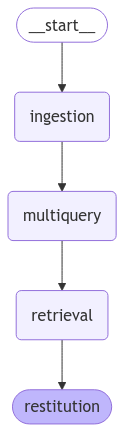

In [247]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [255]:
query = "Comment implementer un tool in LangChain in python?"
source = "https://github.com/P2Enjoy/academy-tutorial-python/blob/main/rag/rag/04-explain-langchain.md"
result = executor.invoke(RAGState(query=query, sources=[source]))

display("💬 Generated Queries:", result['multiple_queries'].queries)
display("🤔 Query Generation Reasoning:", result['multiple_queries'].reasoning)
print("📝 Final Answer:", result['answer'].answer)

'💬 Generated Queries:'

['How to implement a tool in LangChain using Python?',
 'What is the best way to integrate a tool in LangChain with Python?',
 'Can you provide an example of implementing a tool in LangChain using Python?']

'🤔 Query Generation Reasoning:'

'The alternative queries were generated by considering different perspectives on the original question, including providing more specific information about the implementation process and offering examples to illustrate the concept.'

📝 Final Answer: To implement a tool in LangChain using Python, you can use the Tool class from langchain.tools. Here is an example: 

import langchain  
from langchain import OpenAI  
from langchain.tools import Tool  

# Create an instance of the OpenAI model  
openai = OpenAI()  

# Define a new tool that uses the OpenAI model  
tool = Tool.openai.openai_tool  

# Use the tool to generate a response


## RAG level 3 avec FAISS, stored index, configurable

Cette implémentation propose une **architecture avancée** d'un pipeline **Retrieval-Augmented Generation (RAG)** en exploitant **Langraph**, des **classes Pydantic State** pour la gestion centralisée de l'état, et une **approche MultiQuery** pour élargir la couverture de la requête. Cette nouvelle version introduit notamment un **initializer_agent** pour déterminer dynamiquement le chemin à suivre (ingestion ou multiquery) et inclut des modifications dans la gestion des sources, l’indexation FAISS et la restitution.

##### Pourquoi cette approche ?
✅ **Modularité étendue** : Chaque agent (initializer, ingestion, multiquery, retrieval, restitution) est clairement délimité.  
✅ **Gestion centralisée de l'état** : Les classes Pydantic (`RAGState`, `DocumentMetadata`, `MultiQueryOutput`, `ResponseOutput`) assurent une cohérence des données à chaque étape.  
✅ **MultiQuery amélioré** : Génère plusieurs variantes de la requête pour couvrir différents angles de recherche.  
✅ **Persistences multiples** : Possibilité de charger ou créer un index FAISS selon la présence d’un index local.  
✅ **Intégration simplifiée** : La fonction `process_query` orchestre l’appel complet du pipeline en une seule instruction.

---

#### 🏗️ Organisation du pipeline

Ce **pipeline RAG** est désormais structuré autour de **cinq agents** :

1. **🏁 initializer_agent**  
   - Vérifie l'existence d'un index FAISS local.  
   - Oriente le flux vers l'agent d’ingestion ou directement vers l’agent multiquery.

2. **📥 ingestion_agent**  
   - Gère le chargement de documents depuis diverses sources (web, PDF).  
   - Utilise un `RecursiveCharacterTextSplitter` pour segmenter les textes.  
   - Stocke chaque segment avec ses métadonnées (`chunk_id`, `source_url`).

3. **🎯 multiquery_agent**  
   - Génère entre 3 et 5 variations de la question initiale.  
   - Explique le raisonnement pour chaque variante (via `MultiQueryOutput`).  
   - Prépare la requête pour l’agent de récupération.

4. **🔍 retrieval_agent**  
   - Crée ou recharge un index FAISS local (avec `OllamaEmbeddings`).  
   - Effectue une recherche par similarité et consolide les résultats (dédoublonnage).  
   - Retourne la liste des documents pertinents.

5. **📝 restitution_agent**  
   - Utilise un modèle LLM (ChatOllama) pour générer la réponse finale.  
   - Retourne une structure (`ResponseOutput`) comprenant la réponse et les sources exploitées.

---

#### ⚙️ Technologies utilisées

| 📌 Technologie               | 🔎 Rôle                                                        |
|-----------------------------|----------------------------------------------------------------|
| **Langchain** / *Core*      | Gestion de la récupération et de la génération de texte        |
| **Langgraph**               | Organisation du pipeline sous forme de graphe                 |
| **Pydantic**                | Définition et validation des états et sorties structurées      |
| **FAISS**                   | Stockage et recherche des embeddings (persistence locale)      |
| **Chroma**                  | VectorStore alternatif (importé, prêt à l’emploi si besoin)    |
| **Ollama**                  | Modèle LLM local et embeddings (ChatOllama, OllamaEmbeddings)  |
| **IPython.display**         | Visualisation du graphe sous forme d’image                    |

---

#### 📌 Structure du Code

Le pipeline se présente sous la forme d’un **StateGraph** défini par `langgraph`, orchestré par l’objet `executor`. Les points clés sont :

1. **Initialisation**  
   - `initializer_agent` détermine si l’on doit créer un nouvel index ou non.

2. **Ingestion**  
   - `ingestion_agent` charge et segmente les documents, puis met à jour `state.ingested`.

3. **MultiQuery**  
   - `multiquery_agent` génère plusieurs variantes de la question et un raisonnement associé.

4. **Récupération**  
   - `retrieval_agent` utilise FAISS pour rechercher les documents pertinents et les dédupliquer.

5. **Restitution**  
   - `restitution_agent` agrège le contexte et fournit une réponse formatée, avec attribution des sources.

---

#### 🔍 Sorties Structurées

La gestion de l’état et des retours s’appuie sur plusieurs classes Pydantic :

1. **DocumentMetadata**
   ```python
   class DocumentMetadata(BaseModel):
       source_url: str
       chunk_id: int


In [10]:
from typing import List, Optional, Dict, Literal, Any
from pydantic import BaseModel, Field
from operator import itemgetter

from langchain_community.document_loaders import WebBaseLoader, PyPDFLoader

from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores import FAISS

from langchain_core.runnables.config import RunnableConfig
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document

from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, END, START
from langchain.load import dumps, loads

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [11]:
# Structured Output Models
class DocumentMetadata(BaseModel):
    source_url: str
    chunk_id: int


class MultiQueryOutput(BaseModel):
    queries: List[str] = Field(
        description="List of alternative queries generated from the original question",
        min_items=1,
        max_items=5
    )
    reasoning: str = Field(
        description="Explanation of how the alternative queries were relevant to expand the search space for the user query"
    )


class ResponseFormatter(BaseModel):
    answer: str = Field(description="The response to the user's question.")


class ResponseOutput(BaseModel):
    answer: str = Field(description="The response to the user's question.")
    sources: List[DocumentMetadata] = Field(description="The metadata of sources used to generate the answer.")

In [12]:
# State Management
class RAGState(BaseModel):
    query: str
    sources: Dict[str, Any] = None
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[Document]] = None
    multiple_queries: Optional[MultiQueryOutput] = None
    answer: Optional[ResponseOutput] = None

In [13]:
# Source Loader Factory
class SourceLoader:
    @staticmethod
    def get_loader(source_type: str, location: str):
        loaders = {
            "web": lambda loc: WebBaseLoader(web_paths=[loc]),
            "pdf": lambda loc: PyPDFLoader(loc),
        }

        loader = loaders.get(source_type.lower())
        if not loader:
            raise ValueError(f"Unsupported source type: {source_type}")

        return loader(location)

In [14]:
def initializer_agent(state: RAGState, config: RunnableConfig) -> Literal["ingestion", "multiquery"]:
    """
    Determines the flow based on whether documents need to be loaded
    and if FAISS index exists
    """
    faiss_index_path = config["configurable"].get("stored_index")
    faiss_index_exists = os.path.exists(faiss_index_path)

    if not faiss_index_exists:
        return "ingestion"
    else:
        return "multiquery"

In [15]:
def ingestion_agent(state: RAGState, config: RunnableConfig):
    """
    Handles document ingestion from multiple sources with proper document splitting
    and metadata preservation.
    """
    all_docs = []
    total_docs = 0
    global_chunk_id = 0

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=config["configurable"].get("chunk_size", 500),
        chunk_overlap=config["configurable"].get("chunk_overlap", 100)
    )

    for source_type, source_locations in state.sources.items():
        if isinstance(source_locations, str):
            source_locations = [source_locations]

        for location in source_locations:
            try:
                loader = SourceLoader.get_loader(source_type, location)
                docs = loader.load()

                for doc in docs:
                    if not hasattr(doc, 'metadata'):
                        doc.metadata = {}

                    original_metadata = {
                        "source_url": location
                    }

                    splits = text_splitter.split_text(doc.page_content)

                    for split_text in splits:
                        split_doc = Document(
                            page_content=split_text,
                            metadata={
                                **original_metadata,
                                "chunk_id": global_chunk_id
                            }
                        )
                        all_docs.append(split_doc)
                        global_chunk_id += 1
                        total_docs += 1

            except Exception as e:
                continue

    if not all_docs:
        raise ValueError("No documents were successfully loaded")

    return {
        "available_docs": total_docs,
        "ingested": all_docs
    }


In [16]:
def multiquery_agent(state: RAGState, config: RunnableConfig):
    """
    Generates multiple query variations using structured output.
    """
    template = """You are an AI language model assistant. Your task is to:
    1. Generate between 3-5 different versions of the given user question
    2. Each version should provide a different perspective or approach to the original question
    3. Explain your reasoning for generating these specific variations

    Original question: {question}

    Provide your response in a structured format with:
    - A list of alternative queries
    - Your reasoning for generating these specific variations
    """

    # Initialize LLM and embeddings
    target_llm = ChatOllama(
        model=config["configurable"].get("model"),
        temperature=config["configurable"].get("temperature"),
        max_retries=config["configurable"].get("max_retry", 3)
    )

    prompt = ChatPromptTemplate.from_template(template)
    structured_llm = target_llm.with_structured_output(MultiQueryOutput)
    chain = prompt | structured_llm

    result = chain.invoke({
        "question": state.query
    })
    return {"multiple_queries": result}

In [42]:
def retrieval_agent(state: RAGState, config: RunnableConfig):
    """
    Retrieves relevant documents using FAISS with persistence.
    """

    # Create or load FAISS index
    target_embedding = OllamaEmbeddings(
        model=config["configurable"].get("embedding_model")
    );
    index_name = "docs_index"
    try:
        vectorstore = FAISS.load_local(
            folder_path=config["configurable"].get("stored_index"),
            embeddings=target_embedding,
            index_name=index_name,
            allow_dangerous_deserialization=True
        )
        print ("Data index being read from cache!")
    except:
        print ("Building the index...")
        vectorstore = FAISS.from_documents(
            documents=state.ingested,
            embedding=target_embedding
        )
        # Save for future use
        vectorstore.save_local(config["configurable"].get("stored_index"), index_name=index_name)

    docs = vectorstore.max_marginal_relevance_search(
        query=state.query,
        k=len(state.multiple_queries.queries),
        fetch_k=2 * len(state.multiple_queries.queries)
    )

    retrieved_docs = []
    seen_keys = set()

    for doc in docs:
        key = (doc.page_content, doc.metadata.get('chunk_id'))
        if key not in seen_keys:
            retrieved_docs.append(doc)
            seen_keys.add(key)

    return {"retrieved_docs": retrieved_docs}

In [18]:
def restitution_agent(state: RAGState, config: RunnableConfig):
    """
    Generates final response with source attribution.
    """
    if not state.retrieved_docs:
        raise ValueError("No retrieved documents to generate response from")

    # Prepare context from retrieved documents
    context = "\n\n".join(doc.page_content for doc in state.retrieved_docs)

    # Generate the response using the LLM
    target_llm = ChatOllama(
        model=config["configurable"].get("model"),
        temperature=config["configurable"].get("temperature"),
        max_retries=config["configurable"].get("max_retry", 3)
    )
    response = target_llm.invoke(
        f"""Based on the following context, answer the question: {state.query}
        
        Context: {context}
        
        Provide a clear and direct answer."""
    )

    # Extract source metadata
    sources = [
        DocumentMetadata(
            source_url=doc.metadata.get("source_url", ""),
            chunk_id=doc.metadata.get("chunk_id", 0)
        )
        for doc in state.retrieved_docs
    ]

    # Format the response
    formatted_response = ResponseOutput(
        answer=response.content,
        sources=sources
    )

    return {"answer": formatted_response}

In [47]:
# Graph Construction
"""
Constructs and returns the RAG processing graph.
"""
graph = StateGraph(RAGState)

# Add nodes
graph.add_node("ingestion", ingestion_agent)
graph.add_node("multiquery", multiquery_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)

# Connect nodes
graph.add_conditional_edges(
    START,
    initializer_agent
)
# graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "multiquery")
graph.add_edge("multiquery", "retrieval")
graph.add_edge("retrieval", "restitution")
graph.add_edge("restitution", END)

from langgraph.graph.state import CompiledStateGraph
executor = graph.compile()

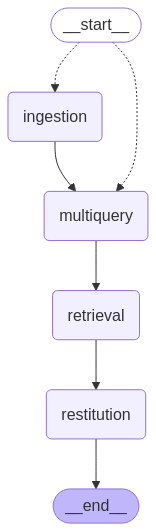

In [48]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [49]:
def process_query(query: str, sources: Dict[str, Any], config: Any):
    """
    Processes a query using the RAG system.
    """
    result = executor.invoke(RAGState(query=query, sources=sources), config=config)

    # Format and return results
    return {
        "answer": result['answer'].answer,
        "sources": [source.model_dump() for source in result['answer'].sources],
    }

In [ ]:
sources = {
    "web": [
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/04-explain-langchain.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/03-explain-langraph.md"
    ]
}
query = "C'est quoi et comment fonctionne un VectorStore en LangChain?"
config = {
    "configurable": {
        "max_contexts": 3,
        "model": "llama3.2",
        "temperature": 0.3,
        "embedding_model": "nomic-embed-text",
        "stored_index": "./faiss_index_rag3",
        "chunk_size": 500,
        "chunk_overlap": 100
    }
}

result = process_query(query, sources, config)
print("💬 Answer:", result['answer'])
print("\n\n📚 Sources Used:")
for source in result['sources']:
    print(f"- {source['source_url']}")

Data index being read from cache!
